In [1]:
from google.colab import files

# This will open a file explorer window for you to select files from your local machine.
uploaded = files.upload()



Saving crime_kolkata.csv to crime_kolkata.csv


In [2]:
import pandas as pd

df = pd.read_csv('crime_kolkata.csv')
df.head()



,Ward,Year,TimeSlot,Month,Crime_Count,Latitude,Longitude
0,54,2008,Afternoon,4,1,22.339107,88.379913
1,54,2021,Evening,9,1,22.339318,88.379008
2,54,2005,Afternoon,3,1,22.340336,88.379100
3,54,2022,Evening,5,1,22.340359,88.377622
4,54,2003,Evening,3,1,22.341539,88.379395


In [3]:
df.shape
df.columns


Index(['Ward', 'Year', 'TimeSlot', 'Month', 'Crime_Count', 'Latitude',
       'Longitude'],
      dtype='object')

In [4]:
df.describe()

,Ward,Year,Month,Crime_Count,Latitude,Longitude
count,16892.000000,16892.000000,16892.000000,16892.000000,16892.000000,16892.000000
mean,39.872958,2012.718387,7.152972,15.641073,22.528251,88.321068
std,21.783499,8.837046,3.338222,38.239486,0.091208,0.063217
min,1.000000,2001.000000,1.000000,1.000000,22.339107,88.070735
25%,23.000000,2002.000000,4.000000,1.000000,22.456156,88.277657
50%,40.000000,2013.000000,7.000000,1.000000,22.519638,88.327419
75%,61.000000,2022.000000,10.000000,7.000000,22.596677,88.367307
max,77.000000,2025.000000,12.000000,565.000000,22.717048,88.469171


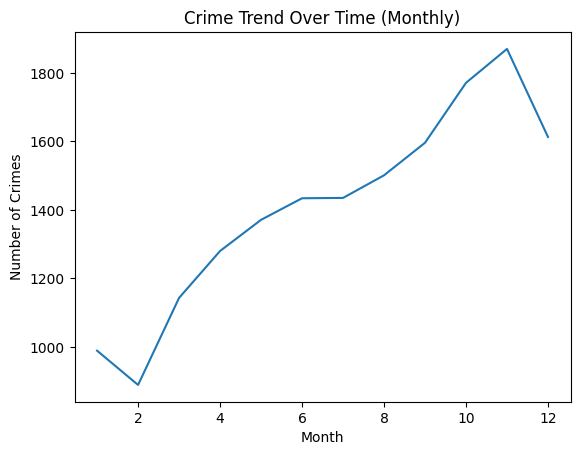

In [5]:
import matplotlib.pyplot as plt

# The DataFrame 'df' already contains a 'Month' column (as seen from df.columns),
# so there's no need to create a 'Date' column or extract the month again.
# The original error 'KeyError: 'Date'' occurred because 'df' did not have a 'Date' column.

# Count crimes per month using the existing 'Month' column
monthly_crime = df.groupby('Month').size()

# plot
plt.figure()
monthly_crime.plot()
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.title('Crime Trend Over Time (Monthly)')
plt.show()

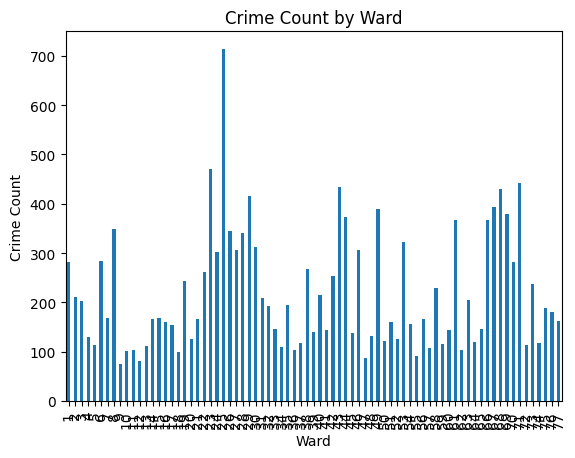

In [6]:
area_crime = df['Ward'].value_counts().sort_index()

plt.figure()
area_crime.plot(kind='bar')
plt.xlabel('Ward')
plt.ylabel('Crime Count')
plt.title('Crime Count by Ward')
plt.show()


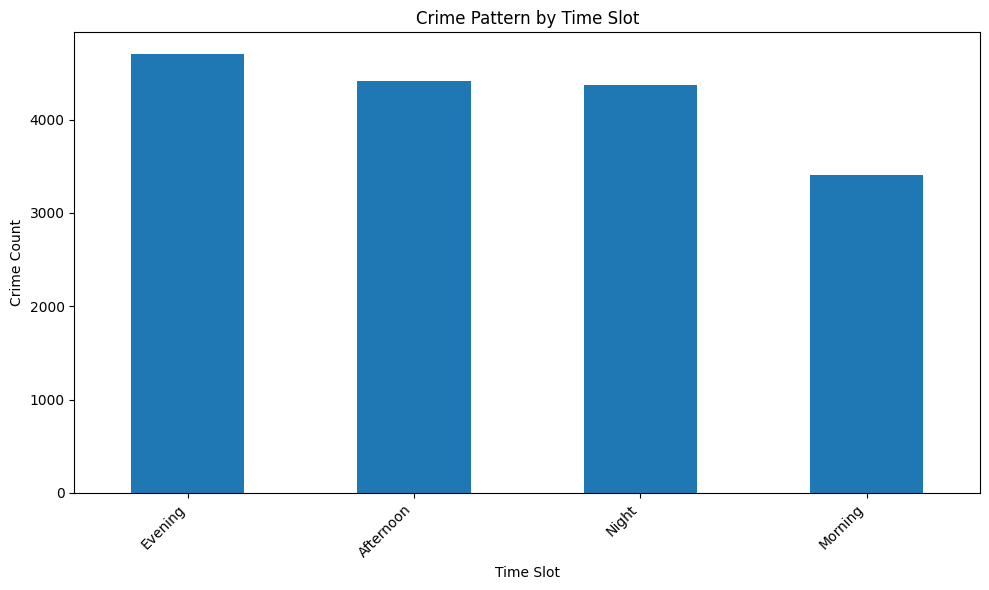

In [7]:
# The original error 'KeyError: 'Date'' occurred because the DataFrame 'df' does not have a 'Date' column.
# Instead of a specific 'Hour' column, we can analyze crime patterns using the 'TimeSlot' column.
# The 'TimeSlot' column contains categories like 'Afternoon', 'Night', 'Evening', which represent time periods.

timeslot_crime = df.groupby('TimeSlot').size().sort_values(ascending=False)

plt.figure(figsize=(10, 6)) # Make the plot larger for better readability
timeslot_crime.plot(kind='bar')
plt.xlabel('Time Slot')
plt.ylabel('Crime Count')
plt.title('Crime Pattern by Time Slot')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [8]:
!pip install folium


In [9]:
import folium
from folium.plugins import HeatMap


In [10]:
import folium

# Define a center for kolkata, as 'kolkata_center' is not defined in this cell.
# This assumes kolkata's approximate center.
Kolkata_center = [22.527634, 88.320593]

# Initialize the map object 'm' before using it
m = folium.Map(location=Kolkata_center, zoom_start=11)

for _, row in df.sample(1000).iterrows():   # limit points for speed
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=2,
        color='red',
        fill=True,
        fill_opacity=0.6
    ).add_to(m)

m

In [11]:
heat_data = df[['Latitude', 'Longitude']].values.tolist()

heat_map = folium.Map(location=Kolkata_center, zoom_start=11)

HeatMap(
    heat_data,
    radius=10,
    blur=15,
    max_zoom=13
).add_to(heat_map)

heat_map

In [12]:
crime_grouped = (
    df.groupby(['Ward', 'Year', 'Month'])
      .size()
      .reset_index(name='Crime_Count')
)

crime_grouped.head()

,Ward,Year,Month,Crime_Count
0,1,2001,3,2
1,1,2001,4,1
2,1,2001,5,1
3,1,2001,6,1
4,1,2001,7,1


In [13]:
X = crime_grouped[['Ward', 'Year', 'Month']]
y = crime_grouped['Crime_Count']


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)


In [15]:
X_train.shape, X_test.shape

((7308, 3), (1827, 3))

In [16]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

model = RandomForestRegressor(
    n_estimators=100)

model.fit(X_train, y_train)

RandomForestRegressor()

In [34]:
ypred = model.predict(X_test)
#in array show the round rasult
ypred.round()

array([1., 1., 1., ..., 4., 2., 1.])

In [35]:
import numpy as np

from sklearn.metrics import mean_absolute_error,mean_squared_error
mae=mean_absolute_error(y_test,ypred)
mse=mean_squared_error(y_test,ypred)
rmse=np.sqrt(mse)

In [36]:
mae,mse,rmse

(0.45286261631089225, 0.428023973727422, np.float64(0.6542354115510884))

In [37]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

R² Score: 0.6682223243118471


In [38]:
print("Crime Prediction System")
print("-----------------------")

def predict_crime(area, year, month):

    # Create a DataFrame for the new input with correct column names matching X_train
    input_data = pd.DataFrame([[area, year, month]],
                               columns=['Ward', 'Year', 'Month'])

    # Make prediction directly using input_data
    prediction = model.predict(input_data)

    # Return the predicted crime count (round to nearest integer as crime counts are discrete)
    return round(prediction[0])

area = int(input("enter ward no (1–77): "))
year = int(input("Enter Year (e.g., 2026): "))
month = int(input("Enter Month (1–12): "))


prediction = predict_crime(area, year, month)

print("\n Prediction Result")
print("-------------------")
print(f"Expected number of crimes: {prediction}")

Crime Prediction System
-----------------------
enter ward no (1–77): 77
Enter Year (e.g., 2026): 2026
Enter Month (1–12): 12

 Prediction Result
-------------------
Expected number of crimes: 4


In [39]:
import folium

# Get latitude and longitude for the entered community area
community_data = df[df['Ward'] == area]
if not community_data.empty:
    lat = community_data['Latitude'].mean()
    lon = community_data['Longitude'].mean()
else:
    # Fallback to Kolkata center if the community area is not found or has no coordinates
    lat, lon = Kolkata_center

# Use the prediction from the previous cell
predicted_crimes = prediction

# Define risk level and color based on predicted crimes
if predicted_crimes <= 1:
    risk = "Low"
    color = "green"
elif predicted_crimes <= 2:
    risk = "Medium"
    color = "orange"
else:
    risk = "High"
    color = "red"

m = folium.Map(location=[lat, lon], zoom_start=13)

folium.Marker(
    location=[lat, lon],
    popup=f"""
    <b>Community Area:</b> {area}<br>
    <b>Date:</b> {month}/{year} <br>
    <b>Predicted Crimes:</b> {predicted_crimes}<br>
    <b>Risk Level:</b> {risk}
    """,
    icon=folium.Icon(color=color)
).add_to(m)

m

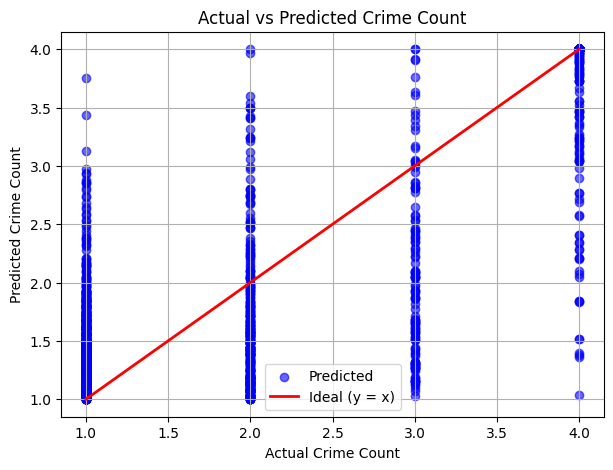

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))

# Predicted values (blue)
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted')

# Ideal line (perfect prediction)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color='red',
    linewidth=2,
    label='Ideal (y = x)'
)

plt.xlabel("Actual Crime Count")
plt.ylabel("Predicted Crime Count")
plt.title("Actual vs Predicted Crime Count")
plt.legend()
plt.grid(True)

plt.show()

